In [106]:
import pandas as pd
#red_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv')
red_wine = pd.read_csv('/Users/macbookair/Downloads/winequality-red.csv', sep=';')
red_wine.head(10)


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5  
5      9.4        5  
6      9.4        5  
7     10.0        7  
8      9.5        7  
9     10.5        5

In [107]:
red_wine.shape

(1599, 12)

In [108]:
red_wine.index

RangeIndex(start=0, stop=1599, step=1)

In [109]:
red_wine.value_counts('alcohol')

alcohol
9.500000     139
9.400000     103
9.800000      78
9.200000      72
10.500000     67
            ... 
9.566667       1
9.950000       1
10.750000      1
8.500000       1
14.900000      1
Length: 65, dtype: int64

In [110]:
red_wine.value_counts('quality')

quality
5    681
6    638
7    199
4     53
8     18
3     10
dtype: int64

In [111]:
red_wine.isnull().sum()
# null value 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [112]:
red_wine.describe().T

count       mean        std      min      25%  \
fixed acidity         1599.0   8.319637   1.741096  4.60000   7.1000   
volatile acidity      1599.0   0.527821   0.179060  0.12000   0.3900   
citric acid           1599.0   0.270976   0.194801  0.00000   0.0900   
residual sugar        1599.0   2.538806   1.409928  0.90000   1.9000   
chlorides             1599.0   0.087467   0.047065  0.01200   0.0700   
free sulfur dioxide   1599.0  15.874922  10.460157  1.00000   7.0000   
total sulfur dioxide  1599.0  46.467792  32.895324  6.00000  22.0000   
density               1599.0   0.996747   0.001887  0.99007   0.9956   
pH                    1599.0   3.311113   0.154386  2.74000   3.2100   
sulphates             1599.0   0.658149   0.169507  0.33000   0.5500   
alcohol               1599.0  10.422983   1.065668  8.40000   9.5000   
quality               1599.0   5.636023   0.807569  3.00000   5.0000   

                           50%        75%        max  
fixed acidity          7.90000   9.200000   15.90000  
volatile acidity       0.52000   0.640000    1.58000  
citric acid            0.26000   0.420000    1.00000  
residual sugar         2.20000   2.600000   15.50000  
chlorides              0.07900   0.090000    0.61100  
free sulfur dioxide   14.00000  21.000000   72.00000  
total sulfur dioxide  38.00000  62.000000  289.00000  
density                0.99675   0.997835    1.00369  
pH                     3.31000   3.400000    4.01000  
sulphates              0.62000   0.730000    2.00000  
alcohol               10.20000  11.100000   14.90000  
quality                6.00000   6.000000    8.00000

In [113]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [114]:
# we are creating a new column called "quality_label", 
# we define a range and associate that range with a label
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low' if value <= 5 else 'medium' if value <= 7 else 'high')
red_wine['quality_label'].head(15)
# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
#red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'],
#categories=['low', 'medium', 'high'])


0        low
1        low
2        low
3     medium
4        low
5        low
6        low
7     medium
8     medium
9        low
10       low
11       low
12       low
13       low
14       low
Name: quality_label, dtype: object

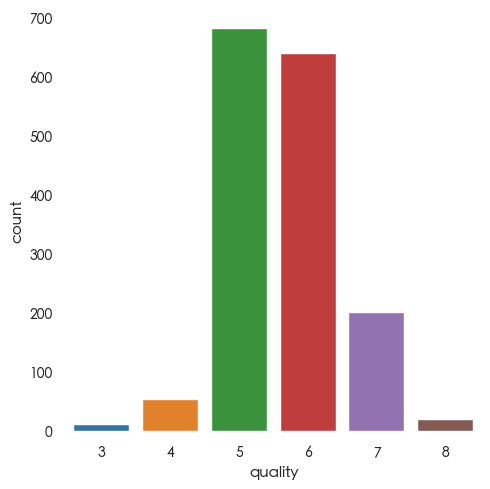

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.catplot(x='quality', data= red_wine, kind= 'count')

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

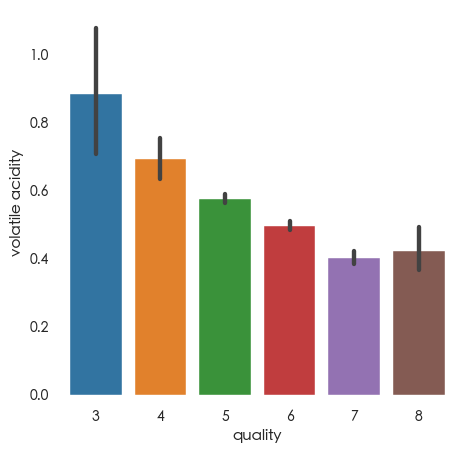

In [116]:
plot = plt.figure(figsize=(5,5))
sns.barplot (x='quality',y= 'volatile acidity', data= red_wine)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

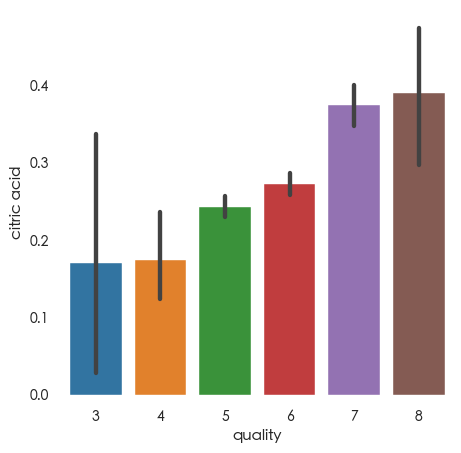

In [117]:
plot = plt.figure(figsize=(5,5))
sns.barplot (x='quality',y= 'citric acid', data= red_wine)

In [118]:
white_wine = pd.read_csv('/Users/macbookair/Downloads/winequality-white.csv', sep=';') # Gathering data
white_wine.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   
5            8.1              0.28         0.40             6.9      0.050   
6            6.2              0.32         0.16             7.0      0.045   
7            7.0              0.27         0.36            20.7      0.045   
8            6.3              0.30         0.34             1.6      0.049   
9            8.1              0.22         0.43             1.5      0.044   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   
5                 30.0                  97.0   0.9951  3.26       0.44   
6                 30.0                 136.0   0.9949  3.18       0.47   
7                 45.0                 170.0   1.0010  3.00       0.45   
8                 14.0                 132.0   0.9940  3.30       0.49   
9                 28.0                 129.0   0.9938  3.22       0.45   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6  
5     10.1        6  
6      9.6        6  
7      8.8        6  
8      9.5        6  
9     11.0        6

In [119]:
white_wine.describe().T

count        mean        std      min         25%  \
fixed acidity         4898.0    6.854788   0.843868  3.80000    6.300000   
volatile acidity      4898.0    0.278241   0.100795  0.08000    0.210000   
citric acid           4898.0    0.334192   0.121020  0.00000    0.270000   
residual sugar        4898.0    6.391415   5.072058  0.60000    1.700000   
chlorides             4898.0    0.045772   0.021848  0.00900    0.036000   
free sulfur dioxide   4898.0   35.308085  17.007137  2.00000   23.000000   
total sulfur dioxide  4898.0  138.360657  42.498065  9.00000  108.000000   
density               4898.0    0.994027   0.002991  0.98711    0.991723   
pH                    4898.0    3.188267   0.151001  2.72000    3.090000   
sulphates             4898.0    0.489847   0.114126  0.22000    0.410000   
alcohol               4898.0   10.514267   1.230621  8.00000    9.500000   
quality               4898.0    5.877909   0.885639  3.00000    5.000000   

                            50%       75%        max  
fixed acidity           6.80000    7.3000   14.20000  
volatile acidity        0.26000    0.3200    1.10000  
citric acid             0.32000    0.3900    1.66000  
residual sugar          5.20000    9.9000   65.80000  
chlorides               0.04300    0.0500    0.34600  
free sulfur dioxide    34.00000   46.0000  289.00000  
total sulfur dioxide  134.00000  167.0000  440.00000  
density                 0.99374    0.9961    1.03898  
pH                      3.18000    3.2800    3.82000  
sulphates               0.47000    0.5500    1.08000  
alcohol                10.40000   11.4000   14.20000  
quality                 6.00000    6.0000    9.00000

In [120]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [121]:

# we are creating a new column called "quality_label", 
# we define a range and associate that range with a label
white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low' if value <= 5 else 'medium' if value <= 7 else 'high')
white_wine['quality_label'].head(15)
# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
#white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'],
#categories=['low', 'medium', 'high'])

0     medium
1     medium
2     medium
3     medium
4     medium
5     medium
6     medium
7     medium
8     medium
9     medium
10       low
11       low
12       low
13    medium
14       low
Name: quality_label, dtype: object

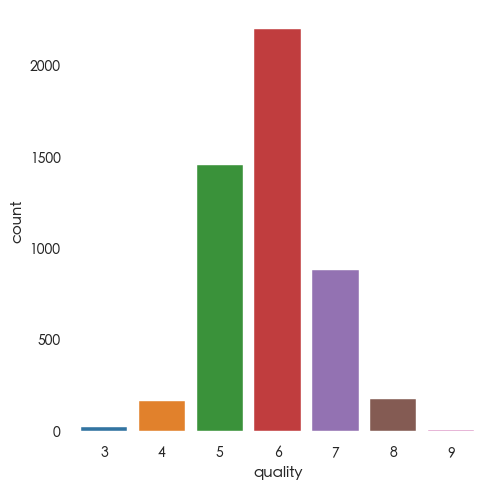

In [122]:
sns.catplot(x='quality', data= white_wine, kind= 'count')


<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

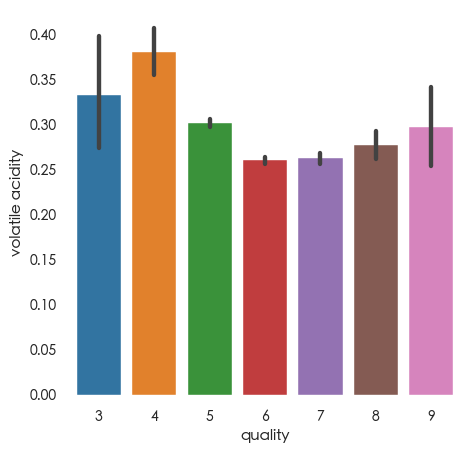

In [123]:
plot = plt.figure(figsize=(5,5))
sns.barplot (x='quality',y= 'volatile acidity', data= white_wine)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

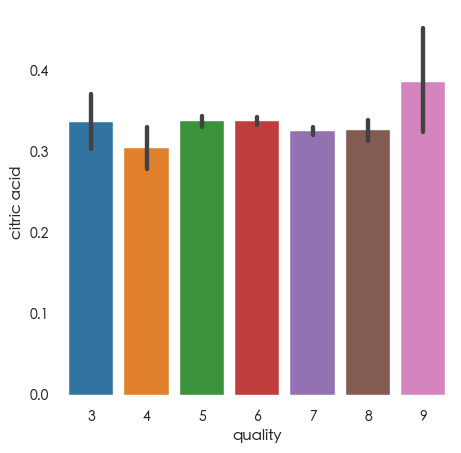

In [124]:
plot = plt.figure(figsize=(5,5))
sns.barplot (x='quality',y= 'citric acid', data= white_wine)

In [125]:
#merge the data of Red and White wines
#wines = pd.concat([red_wine, white_wine])
#wines

# re-shuffle records just to randomize data points
#wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)

In [126]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  quality_label         4898 non-null   object 
 13  wine_type             4898 non-null   object 
 14  quality_label2        4898 non-null   object 
dtypes: float64(11), int64

In [127]:
red_wine['wine_type'] = 'red'
red_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality quality_label wine_type  
0      9.4        5           low       red  
1      9.8        5           low       red  
2      9.8        5           low       red  
3      9.8        6        medium       red  
4      9.4        5           low       red

In [128]:
white_wine['wine_type'] = 'white'
white_wine.head()


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality quality_label wine_type  
0      8.8        6        medium     white  
1      9.5        6        medium     white  
2     10.1        6        medium     white  
3      9.9        6        medium     white  
4      9.9        6        medium     white

In [129]:
#pd.concat([red_wine, white_wine])
#wines = pd.concat([red_wine, white_wine])

#2nd Method 
#red_wine.append(white_wine)

# re-shuffle records just to randomize data points
#wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)
#wines

<AxesSubplot:xlabel='quality_label', ylabel='pH'>

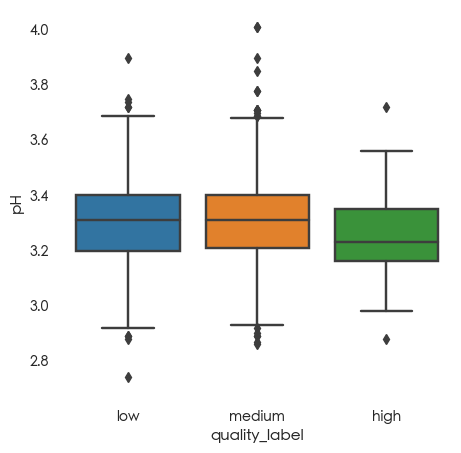

In [130]:
plot = plt.figure(figsize=(5,5))
sns.boxplot (x='quality_label', y= 'pH', data= red_wine)

<AxesSubplot:xlabel='quality_label', ylabel='chlorides'>

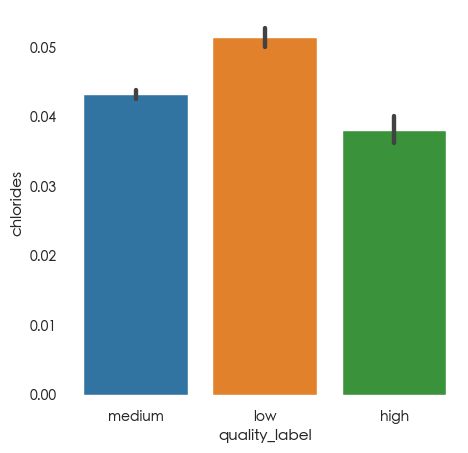

In [131]:
plot = plt.figure(figsize=(5,5))
#sns.boxplot (x='quality_label', y= 'pH', data= white_wine) 
sns.barplot (x='quality_label', y= 'chlorides', data= white_wine) 

<AxesSubplot:xlabel='quality_label', ylabel='alcohol'>

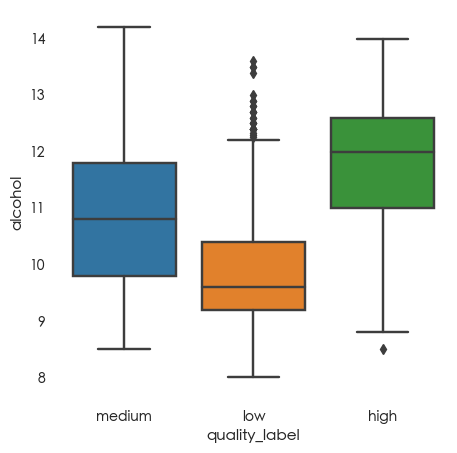

In [132]:
plot = plt.figure(figsize=(5,5))
sns.boxplot (x='quality_label', y= 'alcohol', data= white_wine)

<AxesSubplot:xlabel='quality_label', ylabel='alcohol'>

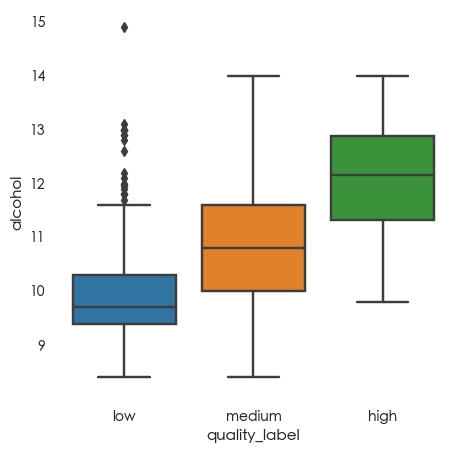

In [133]:
plot = plt.figure(figsize=(5,5))
sns.boxplot (x='quality_label', y= 'alcohol', data= red_wine)

<AxesSubplot:xlabel='quality_label', ylabel='chlorides'>

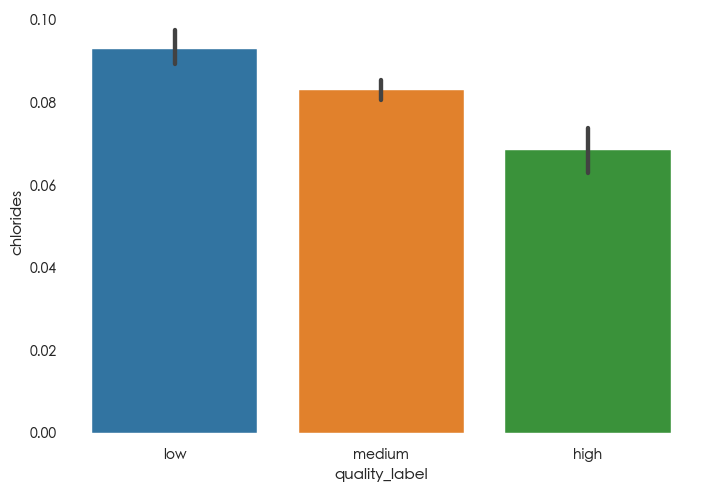

In [134]:
sns.barplot (x='quality_label', y= 'chlorides', data= red_wine)

<AxesSubplot:xlabel='quality_label', ylabel='free sulfur dioxide'>

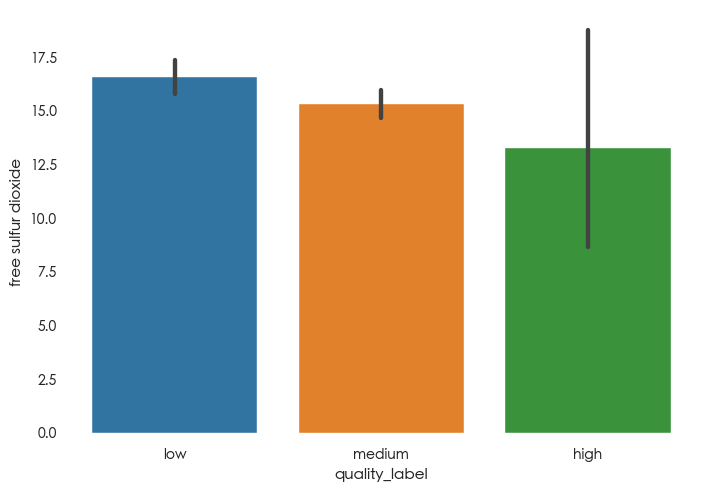

In [135]:
sns.barplot (x='quality_label', y= 'free sulfur dioxide', data= red_wine)

<AxesSubplot:xlabel='quality_label', ylabel='total sulfur dioxide'>

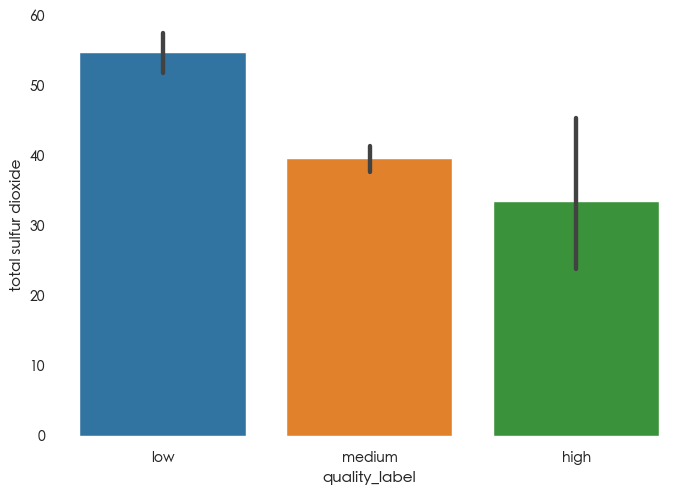

In [136]:
sns.barplot (x='quality_label', y= 'total sulfur dioxide', data= red_wine)

In [137]:
wines.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378  
std       0.160787     0.148806     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

In [138]:
red_wine.median()

fixed acidity            7.90000
volatile acidity         0.52000
citric acid              0.26000
residual sugar           2.20000
chlorides                0.07900
free sulfur dioxide     14.00000
total sulfur dioxide    38.00000
density                  0.99675
pH                       3.31000
sulphates                0.62000
alcohol                 10.20000
quality                  6.00000
dtype: float64

<AxesSubplot:>

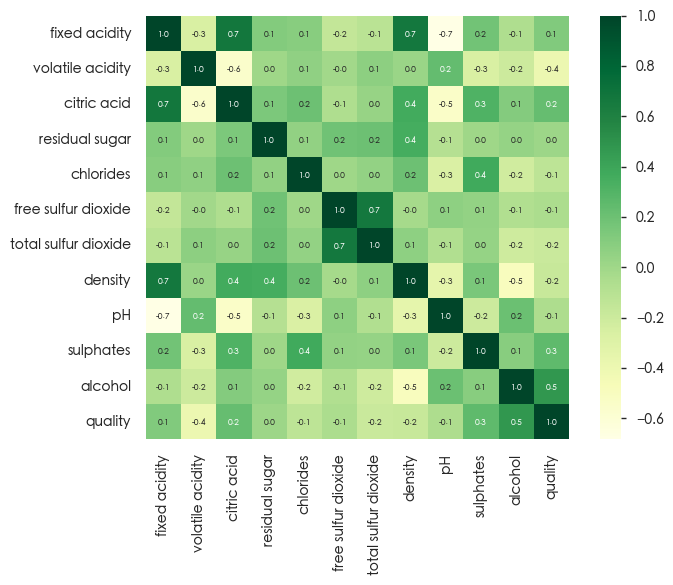

In [139]:
correlation = red_wine.corr()
sns.heatmap(correlation, cbar=True, square=True,fmt='.1f', annot=True, annot_kws={'size':6},cmap='YlGn')
#https://matplotlib.org/stable/tutorials/colors/colormaps.html

<AxesSubplot:>

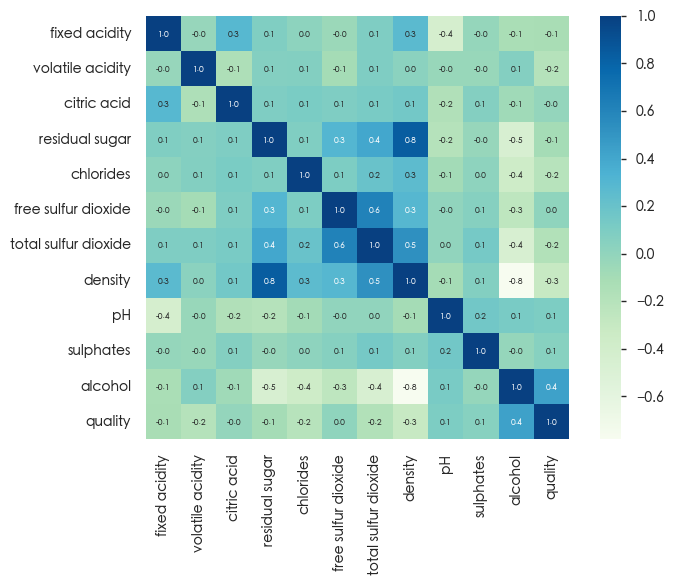

In [140]:
correlation = white_wine.corr()
sns.heatmap(correlation, cbar=True, square=True,fmt='.1f', annot=True, annot_kws={'size':6},cmap='GnBu')

In [141]:
white_wine.value_counts('quality_label')


quality_label
medium    3078
low       1640
high       180
dtype: int64

medium    837
low       744
high       18
Name: quality_label, dtype: int64
(['medium', 'low', 'high'], [837, 744, 18])


TypeError: 'str' object is not callable

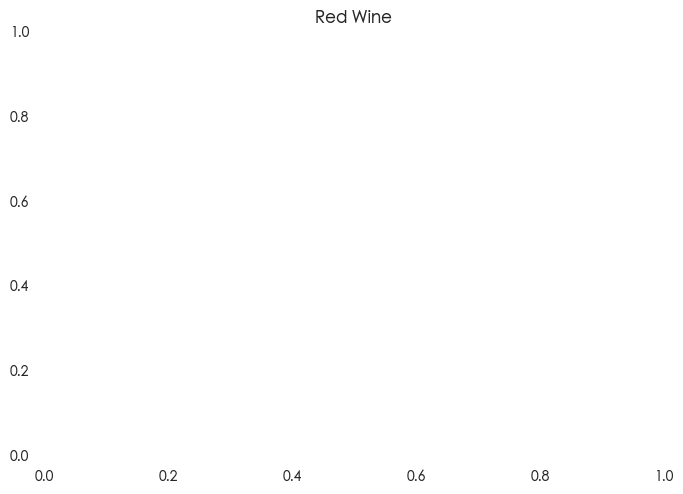

In [142]:
y1 = red_wine['quality_label'].value_counts()
print (y1)
x1 =  (list(y1.index), list(y1.values))
print (x1)
plt.title("Red Wine")
plt.xlabel("Quality")
plt.ylabel("Frequency") 
plt.bar(x1[0],x1[1])
plt.show()

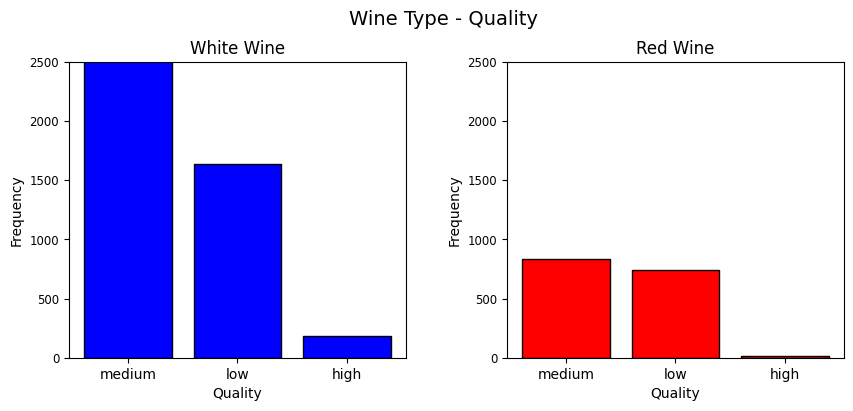

In [ ]:
fig = plt.figure(figsize = (10, 4))
title = fig.suptitle("Wine Type - Quality", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
ax1 = fig.add_subplot(1,2, 1)

x1 = white_wine['quality_label'].value_counts()
x1 =  (list(x1.index), list(x1.values))
plt.title("White Wine")
plt.xlabel("Quality")
plt.ylabel("Frequency")
ax1.set_ylim([0, 2500])
ax1.tick_params(axis='y', which='major', labelsize=8.5)
#plt.bar(x1[0],x1[1])
bar1 = ax1.bar(x1[0], x1[1], color='blue', 
               edgecolor='black', linewidth=1)

ax2 = fig.add_subplot(1,2, 2)
y1 = red_wine['quality_label'].value_counts()
y1 =  (list(y1.index), list(y1.values))
plt.title("Red Wine")
plt.xlabel("Quality")
plt.ylabel("Frequency")
ax2.set_ylim([0, 2500])
ax2.tick_params(axis='y', which='major', labelsize=8.5)
#plt.bar(y1[0],y1[1])
bar2 = ax2.bar(y1[0], y1[1], color='red', 
               edgecolor='black', linewidth=1)
plt.show()

In [ ]:
subset_attributes = ['residual sugar', 'total sulfur dioxide', 'sulphates', 'alcohol', 'volatile acidity', 'quality']
rs = round(red_wine[subset_attributes].describe(),2)
ws = round(white_wine[subset_attributes].describe(),2)
pd.concat([rs, ws], axis=1, keys=['Red Wine Statistics', 'White Wine Statistics'])

Red Wine Statistics                                          \
           residual sugar total sulfur dioxide sulphates  alcohol   
count             1599.00              1599.00   1599.00  1599.00   
mean                 2.54                46.47      0.66    10.42   
std                  1.41                32.90      0.17     1.07   
min                  0.90                 6.00      0.33     8.40   
25%                  1.90                22.00      0.55     9.50   
50%                  2.20                38.00      0.62    10.20   
75%                  2.60                62.00      0.73    11.10   
max                 15.50               289.00      2.00    14.90   

                                White Wine Statistics                       \
      volatile acidity  quality        residual sugar total sulfur dioxide   
count          1599.00  1599.00               4898.00              4898.00   
mean              0.53     5.64                  6.39               138.36   
std               0.18     0.81                  5.07                42.50   
min               0.12     3.00                  0.60                 9.00   
25%               0.39     5.00                  1.70               108.00   
50%               0.52     6.00                  5.20               134.00   
75%               0.64     6.00                  9.90               167.00   
max               1.58     8.00                 65.80               440.00   

                                                    
      sulphates  alcohol volatile acidity  quality  
count   4898.00  4898.00          4898.00  4898.00  
mean       0.49    10.51             0.28     5.88  
std        0.11     1.23             0.10     0.89  
min        0.22     8.00             0.08     3.00  
25%        0.41     9.50             0.21     5.00  
50%        0.47    10.40             0.26     6.00  
75%        0.55    11.40             0.32     6.00  
max        1.08    14.20             1.10     9.00

In [ ]:
#subset_attributes = ['alcohol', 'volatile acidity', 'pH', 'quality']
#ls = round(wines[wines['quality_label'] == 'low'][subset_attributes].describe(),2)
#ms = round(wines[wines['quality_label'] == 'medium'][subset_attributes].describe(),2)
#hs = round(wines[wines['quality_label'] == 'high'][subset_attributes].describe(),2)
#pd.concat([ls, ms, hs], axis=1, keys=['Low Quality Wine', 'Medium Quality Wine', 'High Quality Wine'])


In [ ]:

#from scipy import stats
#from scipy.stats import f_oneway

#F, p = stats.f_oneway(wines[wines['quality_label'] == 'low']['alcohol'],
#wines[wines['quality_label'] == 'medium']['alcohol'],
#wines[wines['quality_label'] == 'high']['alcohol'])
#print('ANOVA test for mean alcohol levels across wine samples with different quality ratings')
#print('F Statistic:', F, '\tp-value:', p)

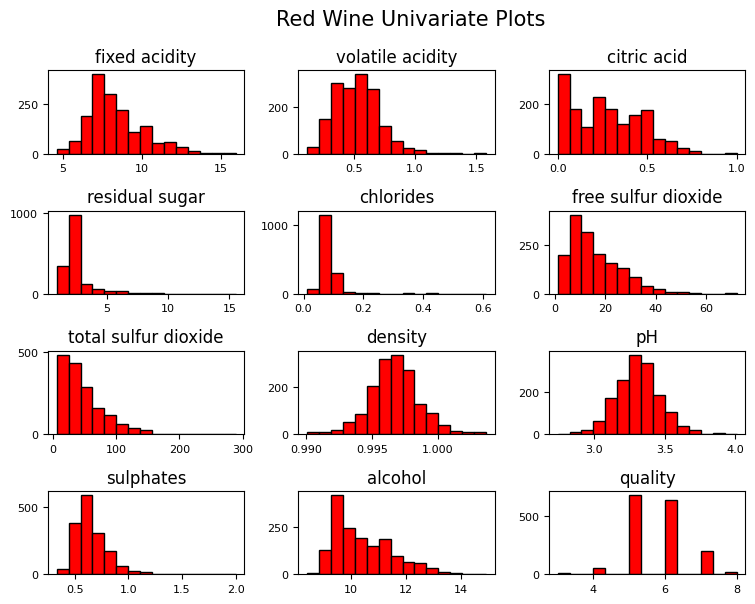

In [ ]:
red_wine.hist(bins=15, color='red', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)

plt.tight_layout(rect=(0, 0, 1.2, 1.2))

rt = plt.suptitle('Red Wine Univariate Plots', x=0.65, y=1.25, fontsize=15)

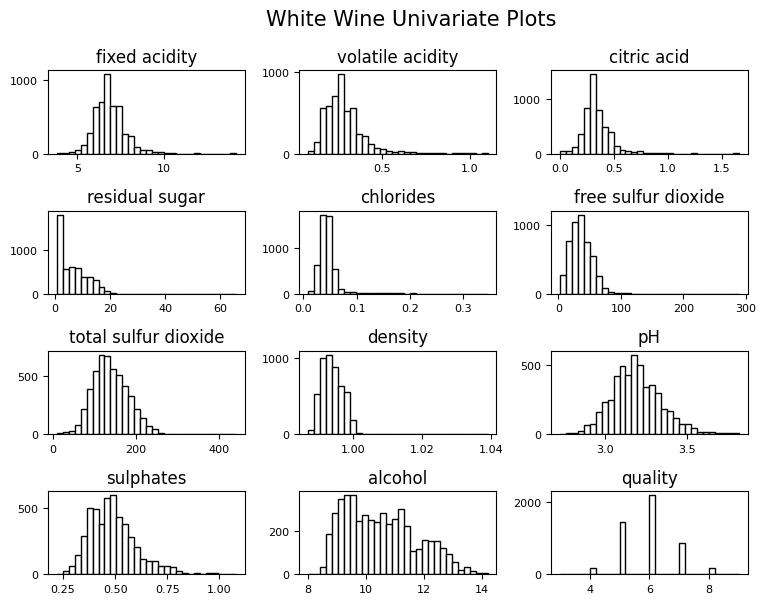

In [ ]:
white_wine.hist(bins=30, color='white', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)

plt.tight_layout(rect=(0, 0, 1.2, 1.2))

wt = plt.suptitle('White Wine Univariate Plots', x=0.65, y=1.25, fontsize=15)

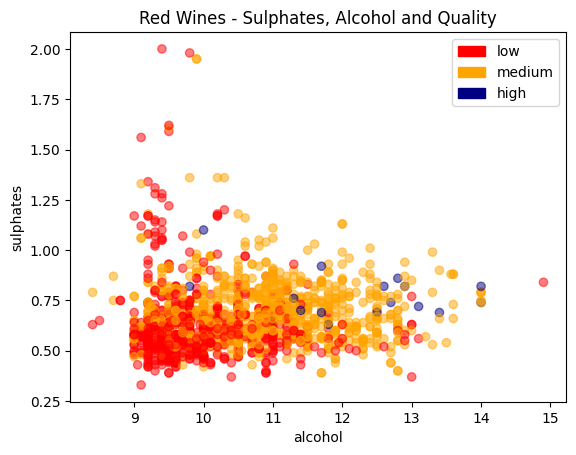

In [ ]:
import matplotlib.patches as mpatches

colors = {"low": "red", "medium": "orange", "high": "navy"}

fig, ax11 = plt.subplots()
scatter = ax11.scatter(red_wine["alcohol"], red_wine["sulphates"],
           c=red_wine['quality_label'].map(colors), alpha=0.5)
ax11.set_xlabel("alcohol", fontsize=10)
ax11.set_ylabel("sulphates", fontsize=10)
ax11.set_title('Red Wines - Sulphates, Alcohol and Quality')

low_quality = mpatches.Patch(color='red', label='low')
medium_quality = mpatches.Patch(color='orange', label='medium')
high_quality = mpatches.Patch(color='navy', label='high')

ax11.legend(handles=[low_quality, medium_quality, high_quality])

plt.show()

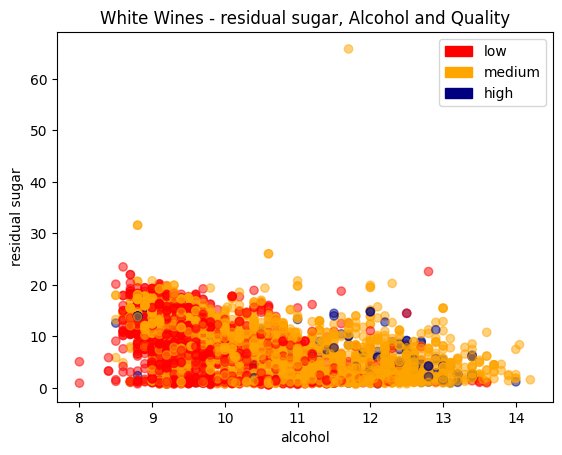

In [ ]:
import matplotlib.patches as mpatches

colors = {"low": "red", "medium": "orange", "high": "navy"}

fig, ax11 = plt.subplots()
scatter = ax11.scatter(white_wine["alcohol"], white_wine["residual sugar"],
           c=white_wine['quality_label'].map(colors), alpha=0.5)
ax11.set_xlabel("alcohol", fontsize=10)
ax11.set_ylabel("residual sugar", fontsize=10)
ax11.set_title('White Wines - residual sugar, Alcohol and Quality')

low_quality = mpatches.Patch(color='red', label='low')
medium_quality = mpatches.Patch(color='orange', label='medium')
high_quality = mpatches.Patch(color='navy', label='high')

ax11.legend(handles=[low_quality, medium_quality, high_quality])

plt.show()

In [ ]:
wines2 = pd.concat([red_wine, white_wine])
wines2

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality quality_label wine_type  
0         9.4        5           low       red  
1         9.8        5           low       red  
2         9.8        5           low       red  
3         9.8        6        medium       red  
4         9.4        5           low       red  
...       ...      ...           ...       ...  
4893     11.2        6        medium     white  
4894      9.6        5           low     white  
4895      9.4        6        medium     white  
4896     12.8        7        medium     white  
4897     11.8        6        medium     white  

[6497 rows x 14 columns]

In [ ]:
from scipy import stats
F, p = stats.f_oneway(wines2[wines2['quality_label'] == 'low']['alcohol'], 
                      wines2[wines2['quality_label'] == 'medium']['alcohol'], 
                      wines2[wines2['quality_label'] == 'high']['alcohol'])
print('ANOVA test for mean alcohol levels across wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)


ANOVA test for mean alcohol levels across wine samples with different quality ratings
F Statistic: 673.0745347231032 	p-value: 2.2715337450621843e-266


In [ ]:
from scipy import stats
F, p = stats.f_oneway(wines2[wines2['quality_label'] == 'low']['pH'], 
                      wines2[wines2['quality_label'] == 'medium']['pH'], 
                      wines2[wines2['quality_label'] == 'high']['pH'])
print('ANOVA test for mean pH levels across wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)


ANOVA test for mean pH levels across wine samples with different quality ratings
F Statistic: 1.2363860803545195 	p-value: 0.2905002779768688


In [ ]:
from scipy import stats
print('ANOVA test for mean sulphate levels across wine samples with different quality ratings')
F, p = stats.f_oneway(wines2[wines2['quality_label'] == 'low']['sulphates'],wines2[wines2['quality_label'] == 'medium']['sulphates'],wines2[wines2['quality_label'] == 'high']['sulphates'])
print('F Statistic:', F, '\tp-value:', p)

ANOVA test for mean sulphate levels across wine samples with different quality ratings
F Statistic: 6.884948526194737 	p-value: 0.0010305533421903841


<AxesSubplot:>

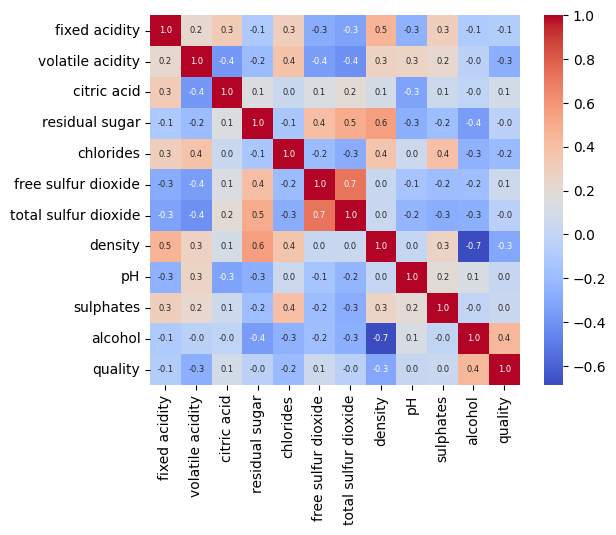

In [ ]:
correlation = wines2.corr()
sns.heatmap(correlation, cbar=True, square=True,fmt='.1f', annot=True, annot_kws={'size':6},cmap= 'coolwarm')

In [ ]:
correlation['quality'].sort_values(ascending= False)

quality                 1.000000
alcohol                 0.444319
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64

In [ ]:
correlation['alcohol'].sort_values(ascending= False)

alcohol                 1.000000
quality                 0.444319
pH                      0.121248
sulphates              -0.003029
citric acid            -0.010493
volatile acidity       -0.037640
fixed acidity          -0.095452
free sulfur dioxide    -0.179838
chlorides              -0.256916
total sulfur dioxide   -0.265740
residual sugar         -0.359415
density                -0.686745
Name: alcohol, dtype: float64

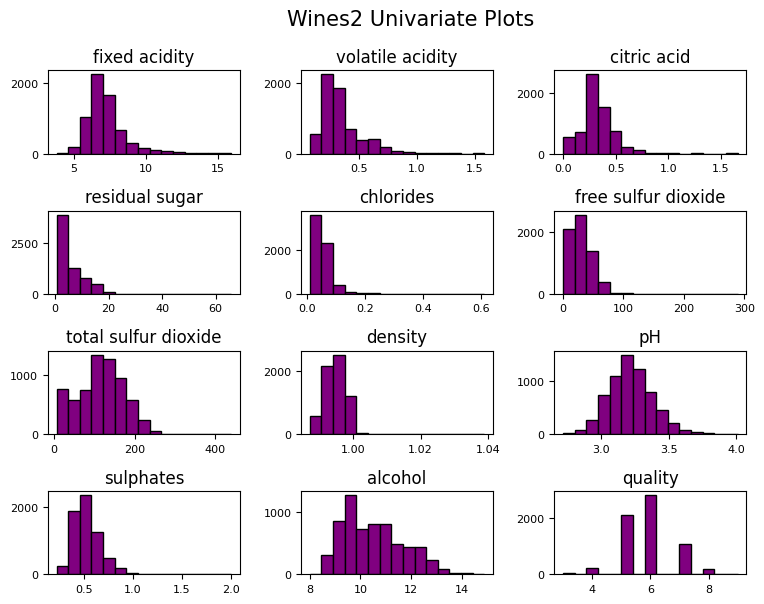

In [ ]:
wines2.hist(bins=15, color='purple', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)

plt.tight_layout(rect=(0, 0, 1.2, 1.2))

rt = plt.suptitle('Wines2 Univariate Plots', x=0.65, y=1.25, fontsize=15)

In [ ]:
wines2['quality'].unique()

array([5, 6, 7, 4, 8, 3, 9])

In [ ]:
red_wine['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [ ]:
white_wine['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

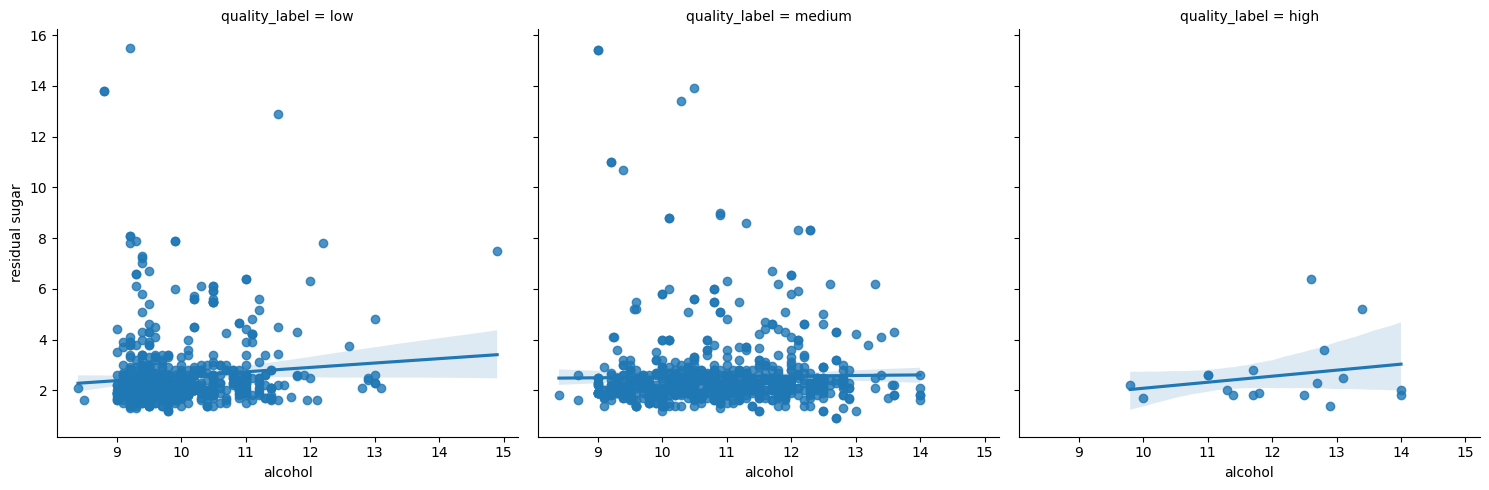

In [ ]:
sns.lmplot(x= 'alcohol', y= 'residual sugar',col='quality_label', data= red_wine)

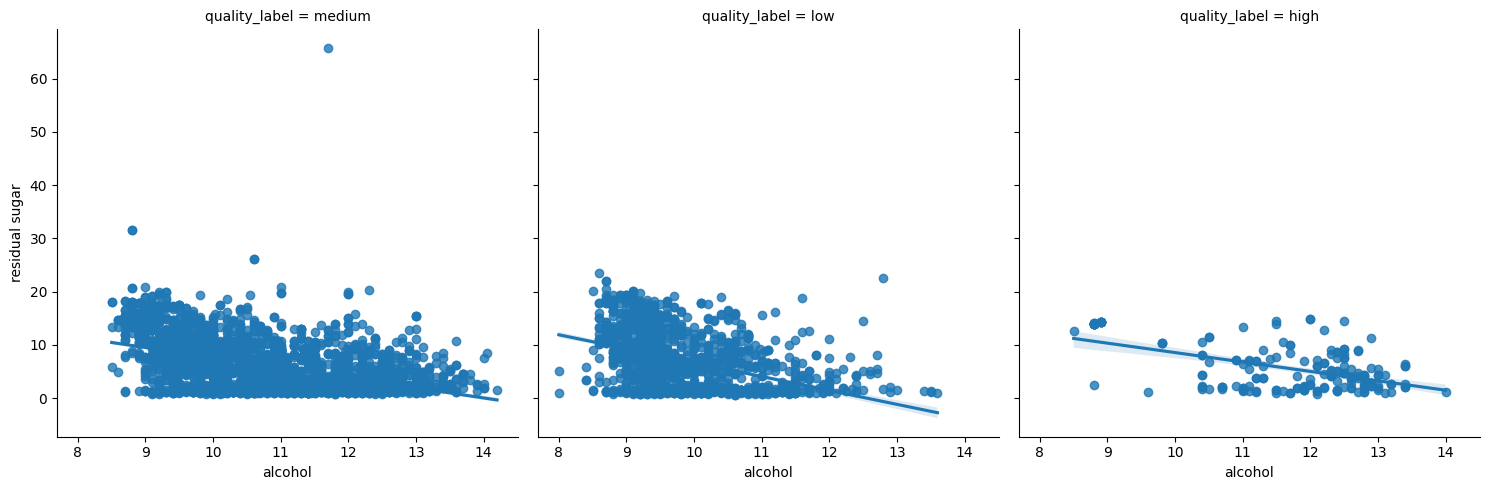

In [ ]:
sns.lmplot(x= 'alcohol', y= 'residual sugar',col='quality_label', data= white_wine)

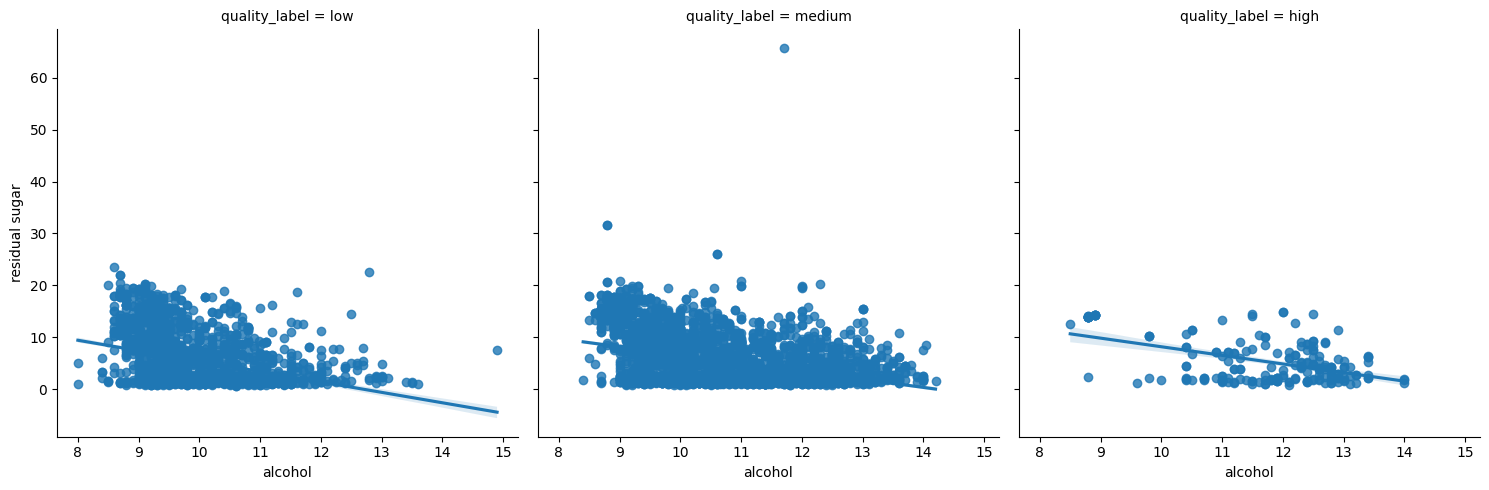

In [ ]:
sns.lmplot(x= 'alcohol', y= 'residual sugar',col='quality_label', data= wines2 )

In [ ]:
# we are creating a new column called "quality_label", we define a range and associate that range with a label

#red_wine[ 'quality' ].head(10) 
#red_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
red_wine['quality'].head(10)
# apply(lambda value: 'low')
red_wine['quality_label2'] = red_wine['quality'].apply(lambda value: 'low' if value <= 5 else 'high')
red_wine['quality_label2'].head(15)
# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
#red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'],
#categories=['low', 'high'])

0      low
1      low
2      low
3     high
4      low
5      low
6      low
7     high
8     high
9      low
10     low
11     low
12     low
13     low
14     low
Name: quality_label2, dtype: object

In [ ]:
wines2['quality'].head(10)
# apply(lambda value: 'low')
wines2['quality_label2'] = wines2['quality'].apply(lambda value: 'low' if value <= 5 else 'high')
wines2['quality_label2'].head(15)

0      low
1      low
2      low
3     high
4      low
5      low
6      low
7     high
8     high
9      low
10     low
11     low
12     low
13     low
14     low
Name: quality_label2, dtype: object

In [ ]:

y2 = red_wine['quality_label2'].value_counts()
y2

high    855
low     744
Name: quality_label2, dtype: int64

In [ ]:
y3 = wines2['quality_label2'].value_counts()
y3

high    4113
low     2384
Name: quality_label2, dtype: int64

In [ ]:
# we are creating a new column called "quality_label", we define a range and associate that range with a label

#red_wine[ 'quality' ].head(10) 
#red_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white_wine['quality'].head(10)
# apply(lambda value: 'low')
white_wine['quality_label2'] = white_wine['quality'].apply(lambda value: 'low' if value <= 5 else 'high')
white_wine['quality_label2'].head(15)
# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
#red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'],
#categories=['low', 'high'])

0     high
1     high
2     high
3     high
4     high
5     high
6     high
7     high
8     high
9     high
10     low
11     low
12     low
13    high
14     low
Name: quality_label2, dtype: object

In [ ]:
yw2 = white_wine['quality_label2'].value_counts()
yw2

high    3258
low     1640
Name: quality_label2, dtype: int64

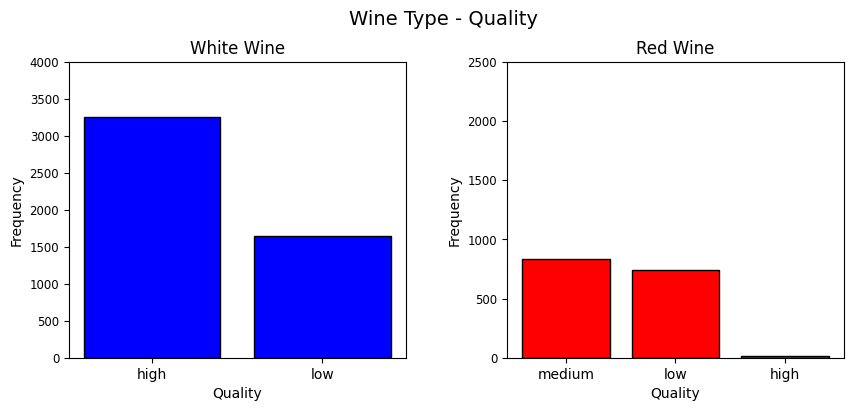

In [ ]:
fig = plt.figure(figsize = (10, 4))
title = fig.suptitle("Wine Type - Quality", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
ax1 = fig.add_subplot(1,2, 1)
#fig, axes= plt.subplot(2,2, sharey= True)
yw2 = white_wine['quality_label2'].value_counts()
yw2 =  (list(yw2.index), list(yw2.values))
plt.title("White Wine")
plt.xlabel("Quality")
plt.ylabel("Frequency")
ax1.set_ylim([0, 4000])
ax1.tick_params(axis='y', which='major', labelsize=8.5)
#plt.bar(x1[0],x1[1])
bar1 = ax1.bar(yw2[0], yw2[1], color='blue', 
               edgecolor='black', linewidth=1)

ax2 = fig.add_subplot(1,2, 2)
y2 = red_wine['quality_label'].value_counts()
y2 =  (list(y2.index), list(y2.values))
plt.title("Red Wine")
plt.xlabel("Quality")
plt.ylabel("Frequency")
ax2.set_ylim([0, 2500])
ax2.tick_params(axis='y', which='major', labelsize=8.5)
#plt.bar(y1[0],y1[1])
bar2 = ax2.bar(y2[0], y2[1], color='red', 
               edgecolor='black', linewidth=1)
#fig, axes= plt.subplot(2,2, sharey= True)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport 
#pip install dtale
#import dtale
red_wine = pd.read_csv('/Users/macbookair/Downloads/winequality-red.csv', sep=';')
profile= ProfileReport(red_wine, title="Pandas Profiling Report")



In [ ]:
import dtale
red_wine = pd.read_csv('/Users/macbookair/Downloads/winequality-red.csv', sep=';')
dtale.show(red_wine)

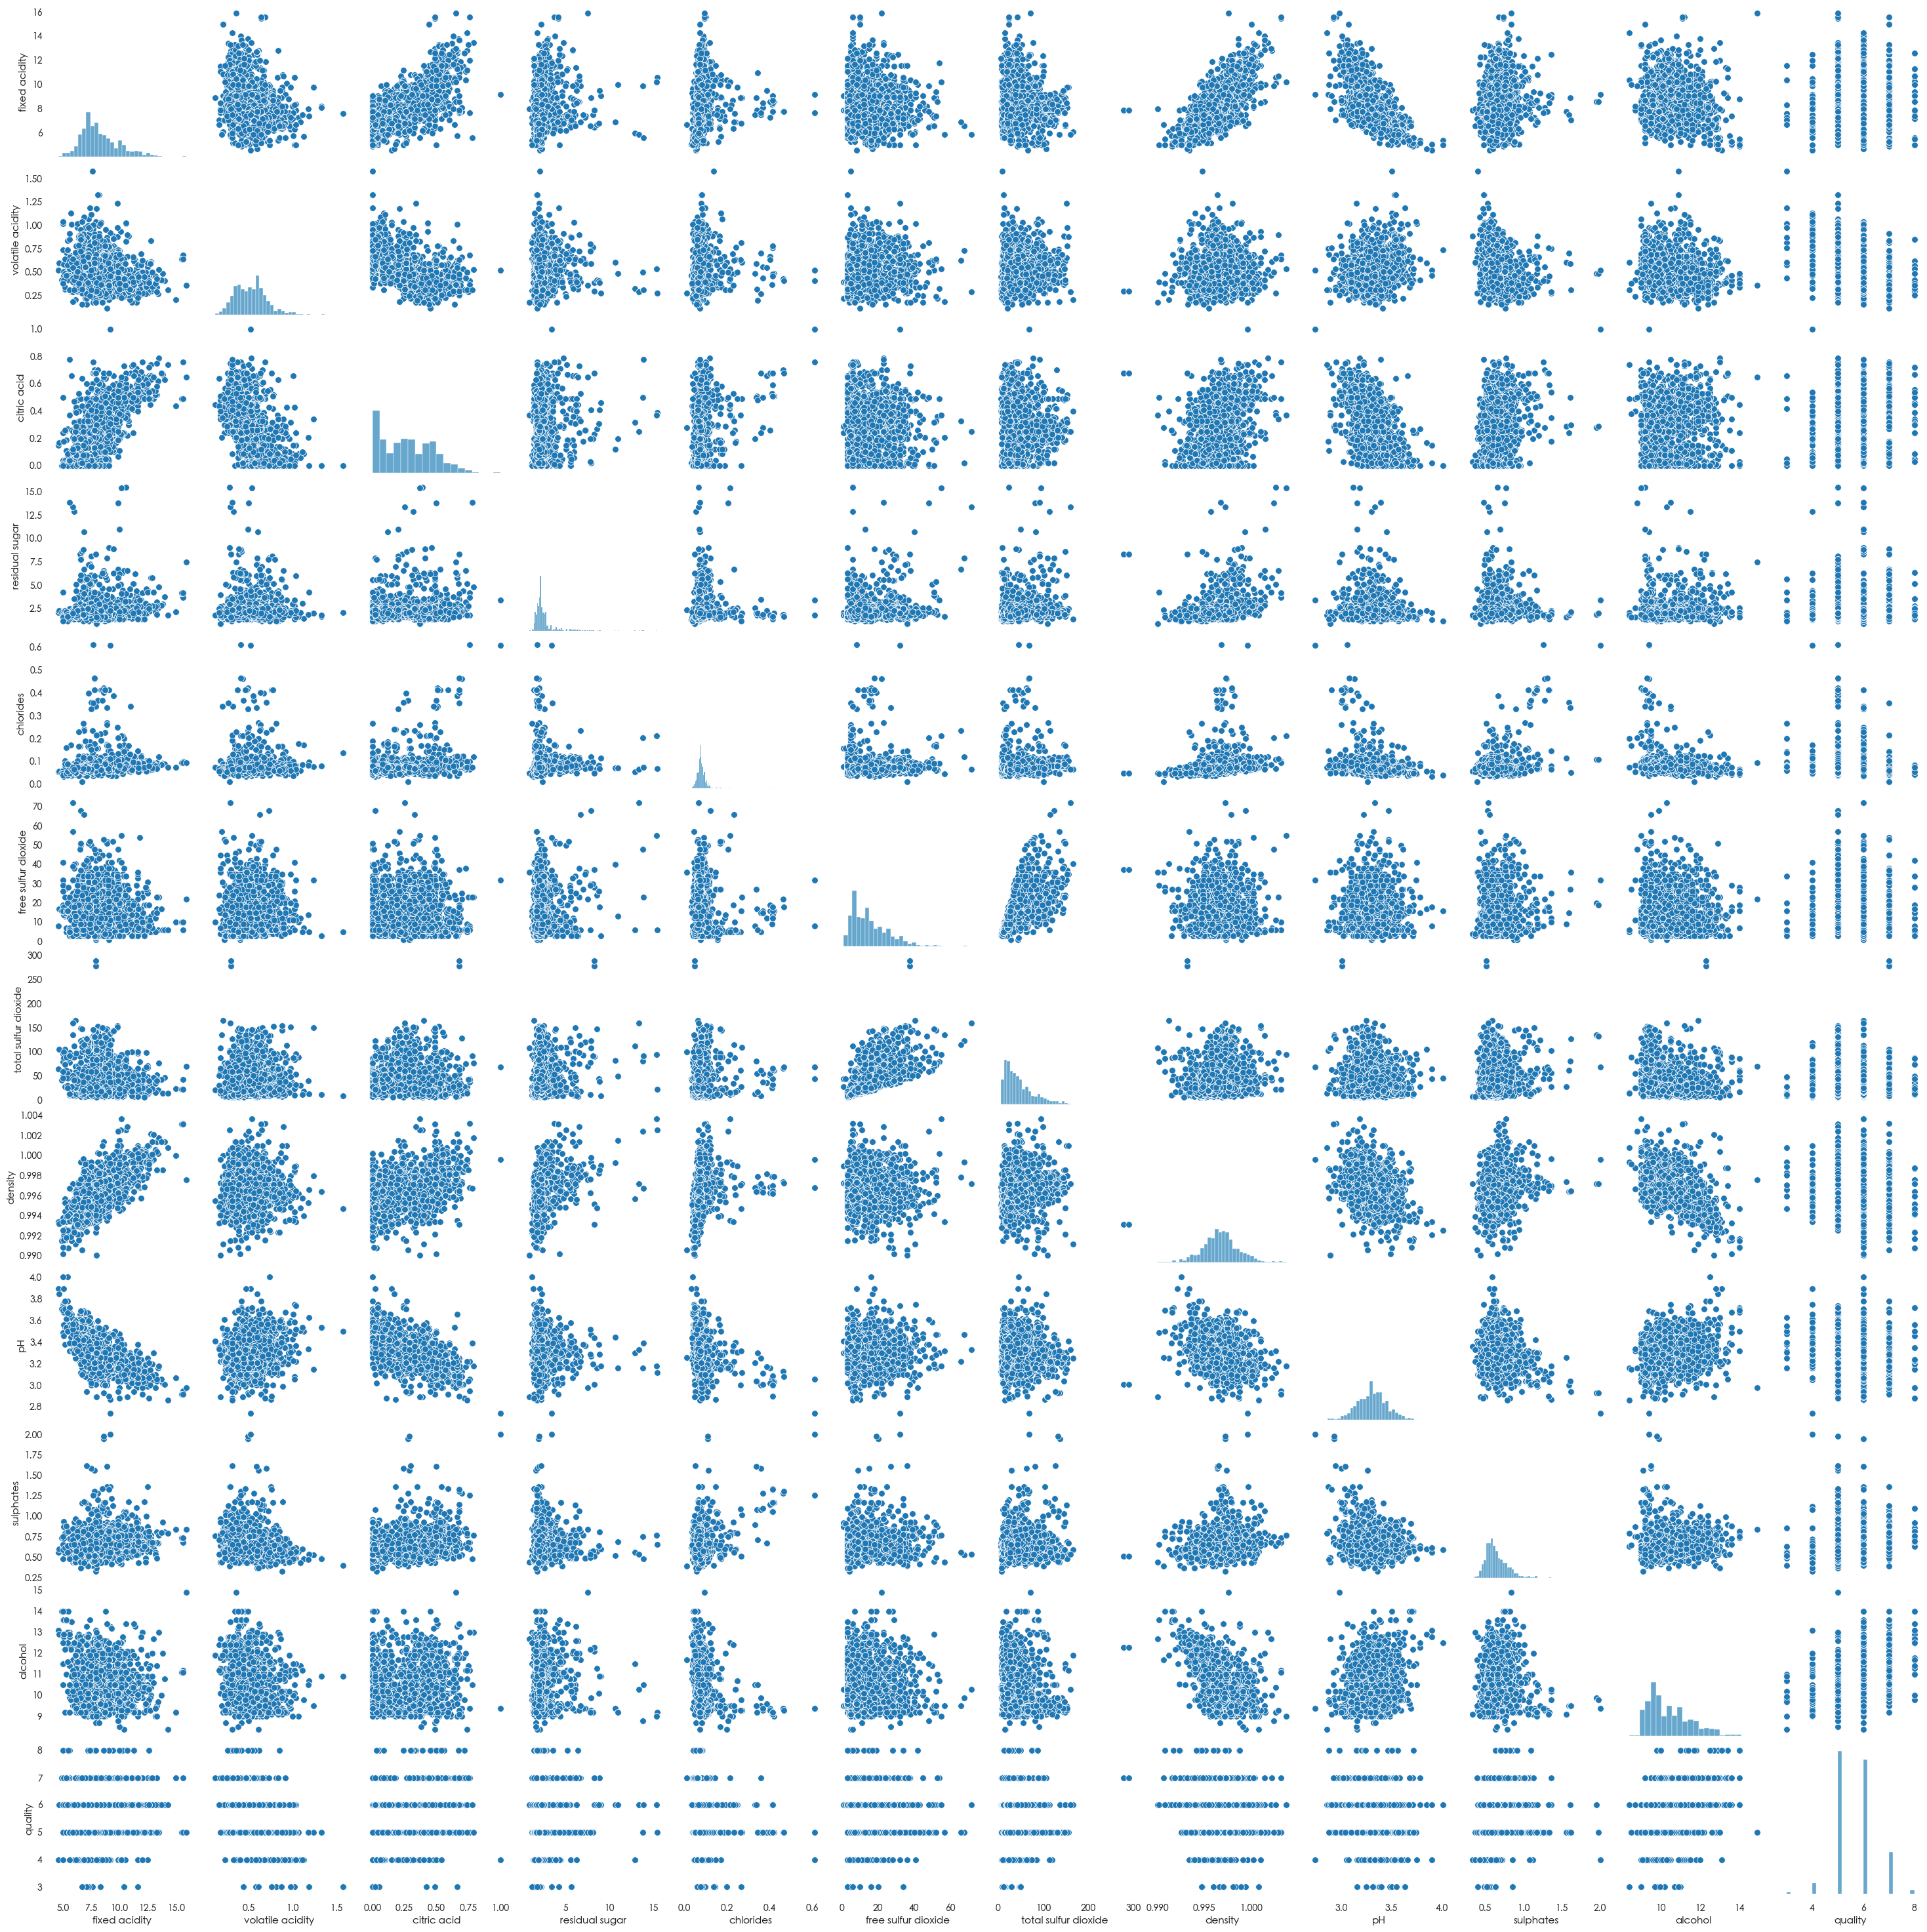

In [ ]:
sns.pairplot(red_wine)
plt.show()

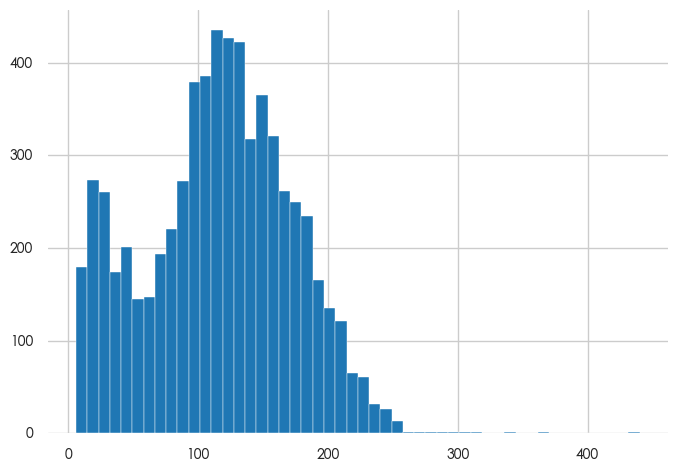

In [ ]:
wines2['total sulfur dioxide'].hist(bins=50);
plt.xlabel=('Quality')
plt.ylabel=('Total sulfur dioxide')
plt.show()

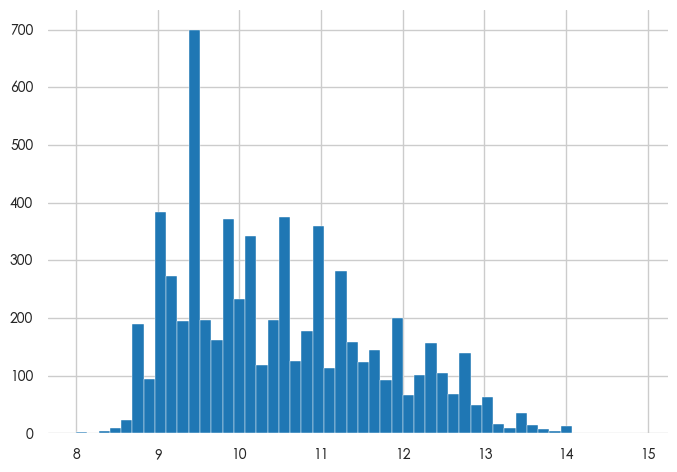

In [ ]:
wines2['alcohol'].hist(bins=50);
plt.xlabel=('Quality')
plt.ylabel=('Total sulfur dioxide')
plt.show()

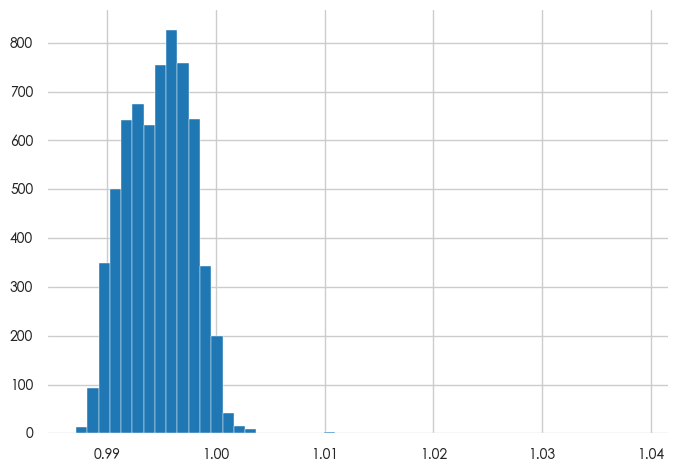

In [ ]:
wines2['density'].hist(bins=50);
plt.xlabel=('Quality')
plt.ylabel=('Total sulfur dioxide')
plt.show()

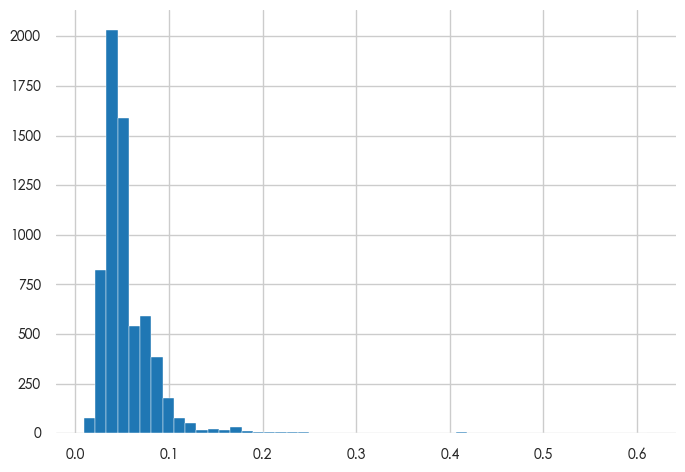

In [ ]:
wines2['chlorides'].hist(bins=50);
plt.xlabel=('Quality')
plt.ylabel=('Total sulfur dioxide')
plt.show()

[]

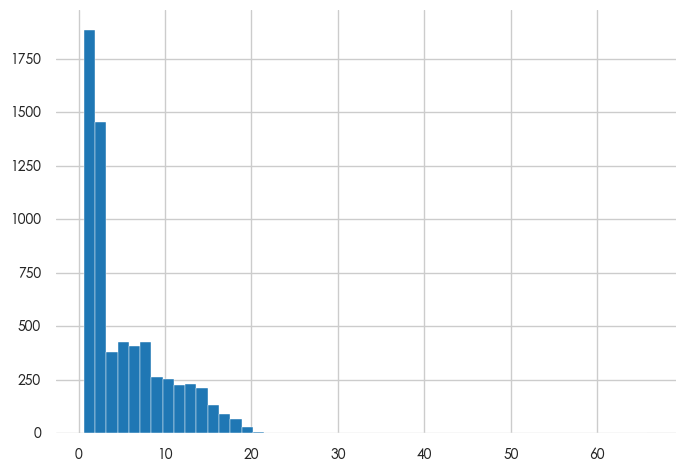

In [ ]:
wines2['residual sugar'].hist(bins=50);
plt.xlabel=('Quality')
plt.ylabel=('Total sulfur dioxide')
plt.plot(style = ',-')
#plt.show()

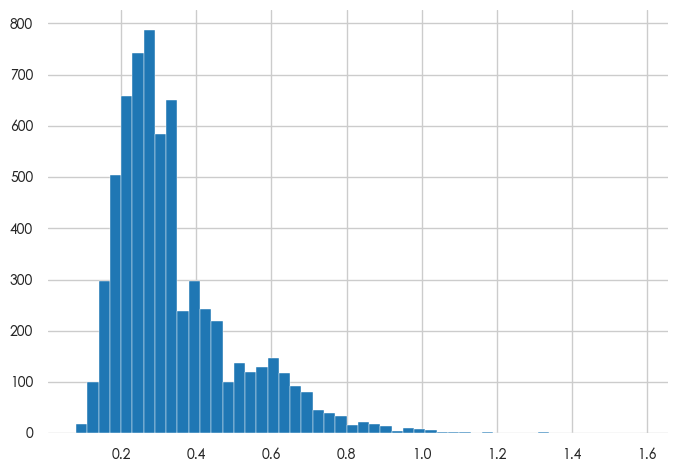

In [ ]:
wines2['volatile acidity'].hist(bins=50);
plt.xlabel=('Quality')
plt.ylabel=('Total sulfur dioxide')
plt.show()

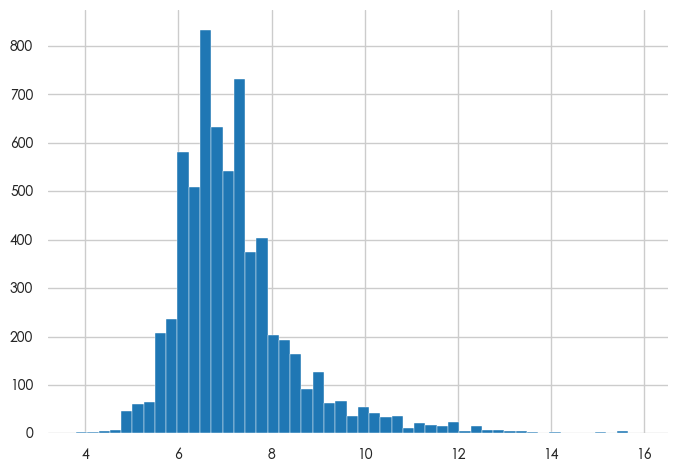

In [ ]:
wines2['fixed acidity'].hist(bins=50,);
plt.xlabel=('Quality')
plt.ylabel=('Total sulfur dioxide')
plt.plot()
plt.show()

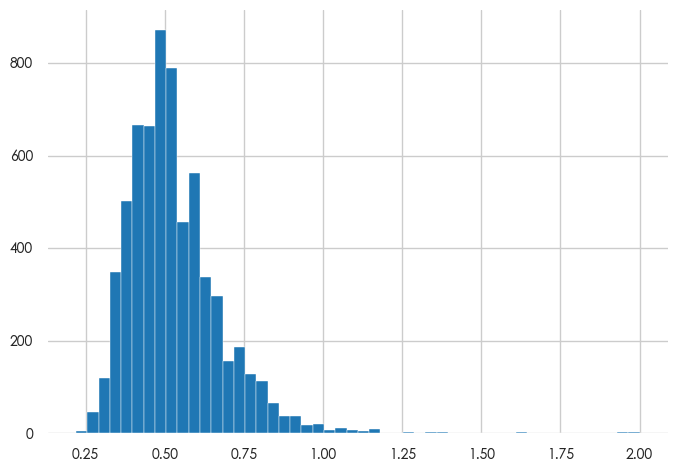

In [ ]:
wines2['sulphates'].hist(bins=50);
plt.xlabel=('Quality')
plt.ylabel=('Total sulfur dioxide')
plt.show()

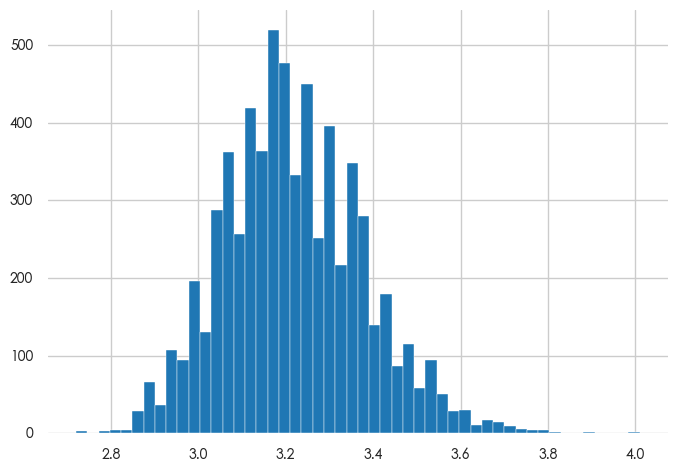

In [ ]:
wines2['pH'].hist(bins=50);
plt.xlabel=('Quality')
plt.ylabel=('Total sulfur dioxide')
plt.show()

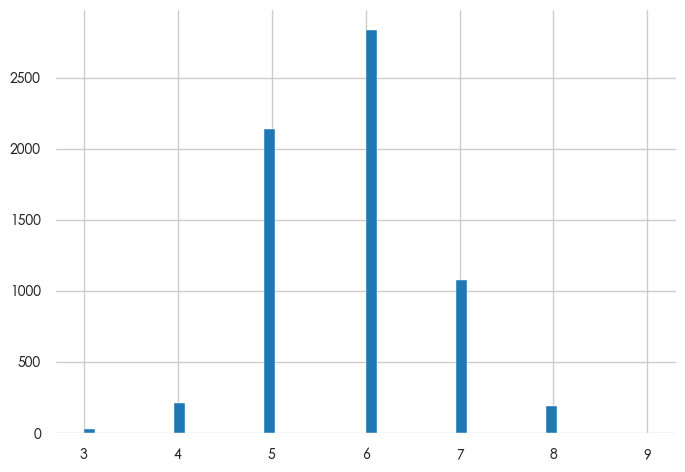

In [ ]:
wines2['quality'].hist(bins=50);
plt.xlabel=('Quality')
plt.ylabel=('Total sulfur dioxide')
plt.show()

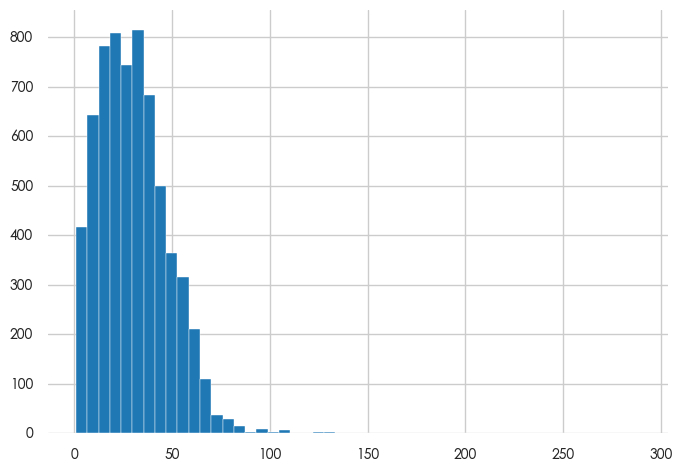

In [ ]:
wines2['free sulfur dioxide'].hist(bins=50);
plt.xlabel=('Quality')
plt.ylabel=('Total sulfur dioxide')
plt.show()

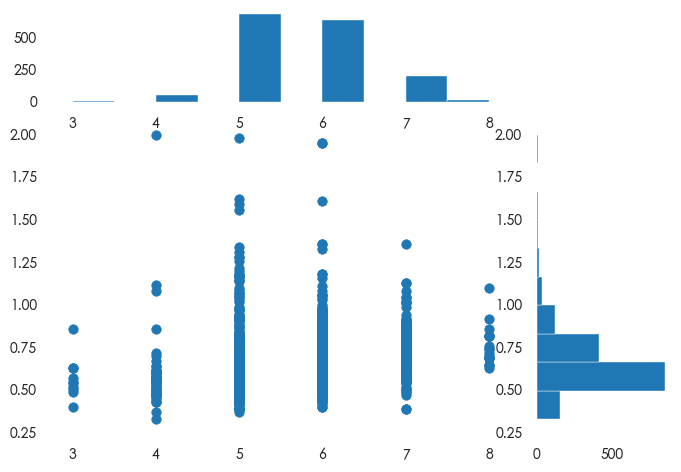

In [ ]:
from matplotlib.gridspec import GridSpec
fig = plt.figure()
gs = GridSpec(4, 4)
ax_scatter = fig.add_subplot(gs[1:4, 0:3])
ax_hist_x = fig.add_subplot(gs[0,0:3])
ax_hist_y = fig.add_subplot(gs[1:4, 3])
ax_scatter.scatter(red_wine['quality'],red_wine['sulphates'])
ax_hist_x.hist(red_wine['quality'])
ax_hist_y.hist(red_wine['sulphates'], orientation = 'horizontal')
plt.show()

<AxesSubplot:xlabel='quality_label', ylabel='alcohol'>

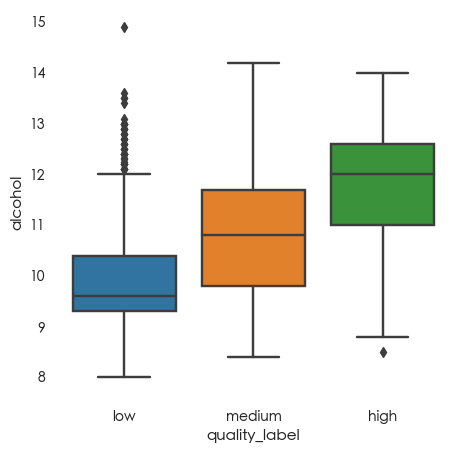

In [ ]:
plot = plt.figure(figsize=(5,5))
sns.boxplot (x='quality_label', y= 'alcohol', data= wines2)

<AxesSubplot:xlabel='quality_label', ylabel='volatile acidity'>

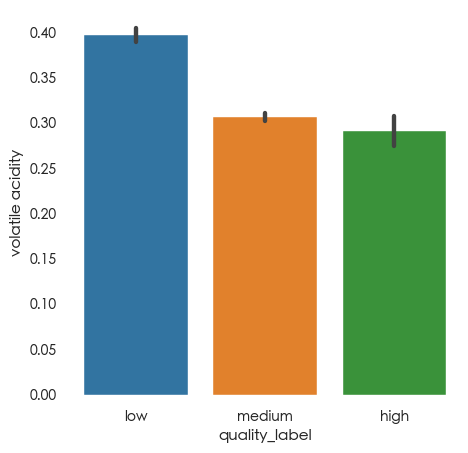

In [ ]:
plot = plt.figure(figsize=(5,5))
sns.barplot (x='quality_label', y= 'volatile acidity', data= wines2)

<AxesSubplot:xlabel='quality_label', ylabel='density'>

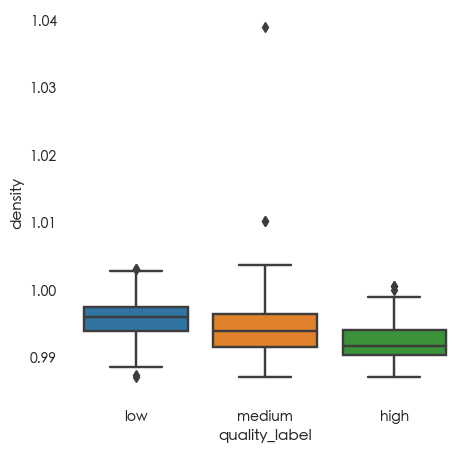

In [ ]:
plot = plt.figure(figsize=(5,5))
sns.boxplot (x='quality_label', y= 'density', data= wines2)

<AxesSubplot:xlabel='quality_label', ylabel='residual sugar'>

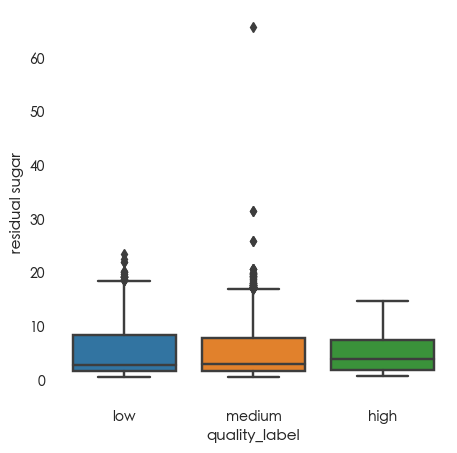

In [ ]:
plot = plt.figure(figsize=(5,5))
sns.boxplot (x='quality_label', y= 'residual sugar', data= wines2)

<AxesSubplot:xlabel='quality_label', ylabel='free sulfur dioxide'>

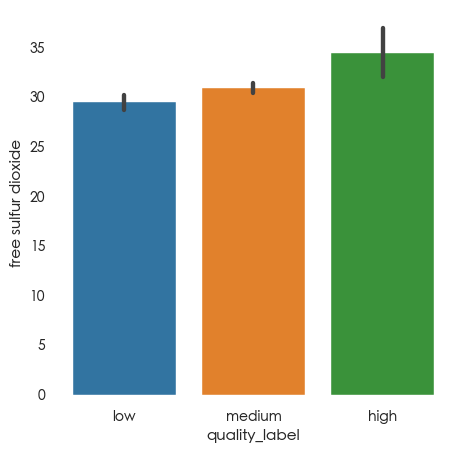

In [ ]:
plot = plt.figure(figsize=(5,5))
sns.barplot (x='quality_label', y= 'free sulfur dioxide', data= wines2)

<AxesSubplot:xlabel='quality_label', ylabel='total sulfur dioxide'>

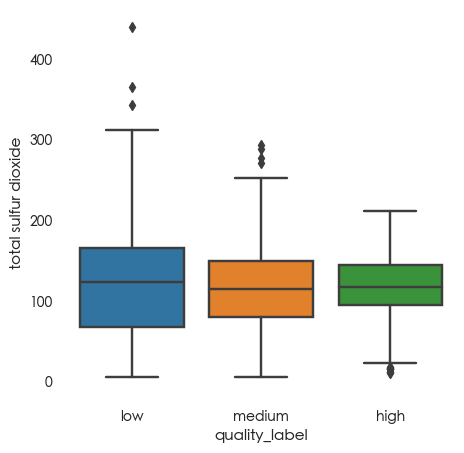

In [ ]:
plot = plt.figure(figsize=(5,5))
sns.boxplot (x='quality_label', y= 'total sulfur dioxide', data= wines2)

<AxesSubplot:xlabel='quality_label', ylabel='chlorides'>

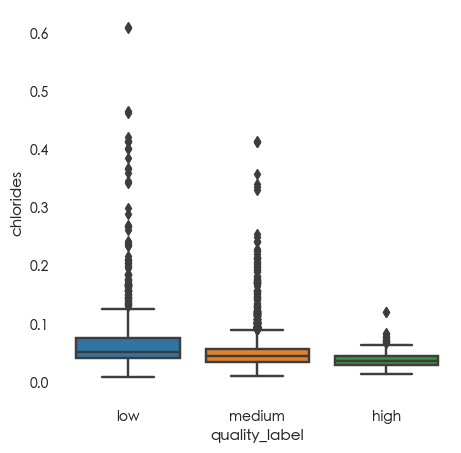

In [ ]:
plot = plt.figure(figsize=(5,5))
sns.boxplot (x='quality_label', y= 'chlorides', data= wines2)

<AxesSubplot:xlabel='quality_label', ylabel='sulphates'>

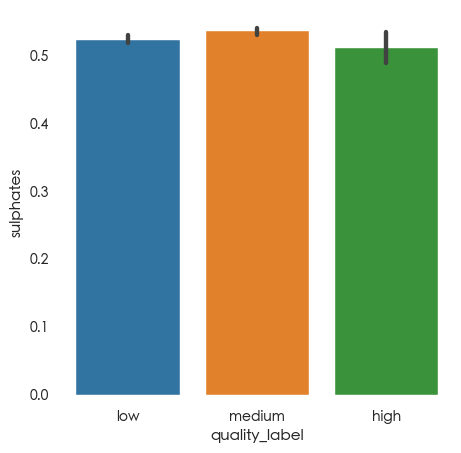

In [ ]:
plot = plt.figure(figsize=(5,5))
sns.barplot (x='quality_label', y= 'sulphates', data= wines2)

<AxesSubplot:xlabel='quality_label', ylabel='fixed acidity'>

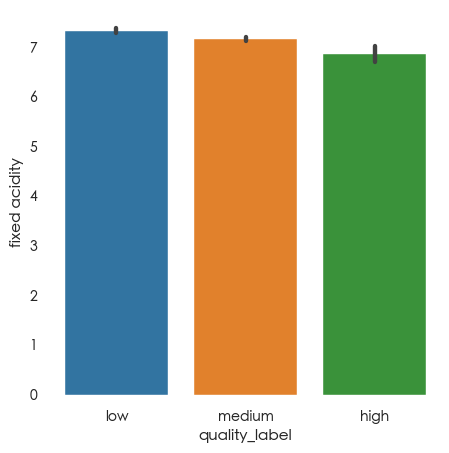

In [ ]:
plot = plt.figure(figsize=(5,5))
sns.barplot (x='quality_label', y= 'fixed acidity', data= wines2)

<AxesSubplot:xlabel='quality_label', ylabel='pH'>

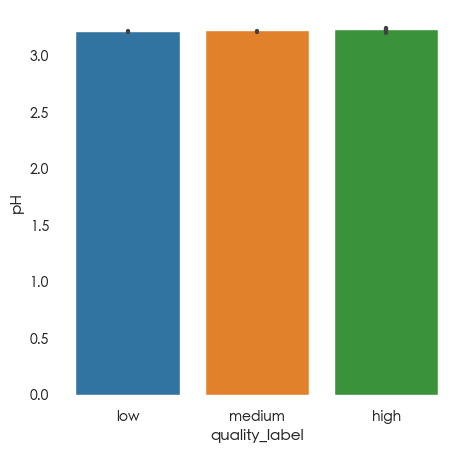

In [ ]:
plot = plt.figure(figsize=(5,5))
sns.barplot (x='quality_label', y= 'pH', data= wines2)

<AxesSubplot:xlabel='quality_label', ylabel='citric acid'>

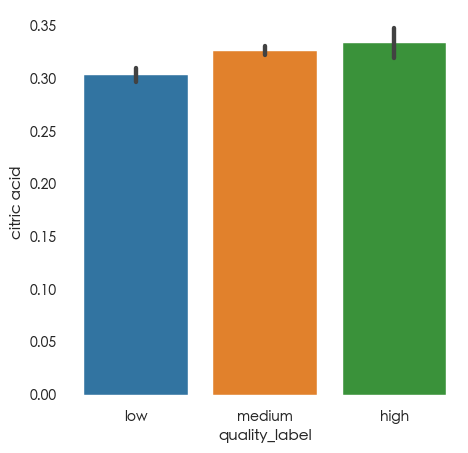

In [ ]:
plot = plt.figure(figsize=(5,5))
sns.barplot (x='quality_label', y= 'citric acid', data= wines2)

In [ ]:
Q1 = wines2.quantile(0.25)
Q3 = wines2.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
#outliers identification

fixed acidity            1.30000
volatile acidity         0.17000
citric acid              0.14000
residual sugar           6.30000
chlorides                0.02700
free sulfur dioxide     24.00000
total sulfur dioxide    79.00000
density                  0.00465
pH                       0.21000
sulphates                0.17000
alcohol                  1.80000
quality                  1.00000
dtype: float64


In [ ]:
print(wines2['residual sugar'].skew())
#wines2['total sulfur dioxide'].describe()
#skewness value should be between -1 and +1, 
#and any major deviation from this range indicates the presence of extreme values.

1.4354042627889907


In [ ]:
print(wines2['chlorides'].skew())

5.399827731969901
